In [1]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
%matplotlib inline
def plot_learning_curves(model,x,y):
    print('plotting curves...')
    x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.2)
    train_errors,val_errors=[],[]
    for m in range(1,len(x_train),100):
        model.fit(x_train[:m],y_train[:m])
        y_train_predict=model.predict(x_train[:m])
        y_val_predict=model.predict(x_val)
        train_errors.append(mean_squared_error(y_train_predict,y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict,y_val))
    train_errors=np.array(train_errors)
    val_errors=np.array(val_errors)
    plt.plot(((train_errors)),'r-+',linewidth=2,label='train')
    plt.plot(((val_errors)),'b-',linewidth=2,label='val')
    print('val_errors:',val_errors[-1],'train_errors:',train_errors[-1])
    print('delta_train_val_errors:',val_errors[-1]-train_errors[-1])

In [2]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor as chosen_model
print('preparing data...')
train = pd.read_csv('happiness_train_complete1.csv')
train = train.loc[train['happiness'] != -8]
del_list = ['id', 'survey_time', 'edu_other', 'property_other','happiness', 'invest_other']
y = train.happiness.values
for index in del_list:
    del train[index]
for i in train.columns:
    train[i].astype(float)
    train[i][train[i] < 0] = train[i].median()
    train[i].fillna(train[i].median(), inplace=True)
print('done!')
X = train.values


preparing data...
done!


plotting curves...
val_errors: 0.4640860586346035 train_errors: 0.3904041212845563
delta_train_val_errors: 0.07368193735004719


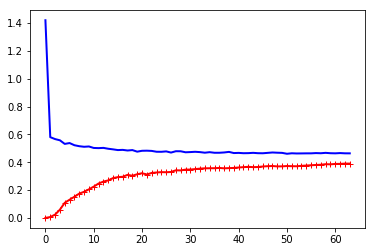

In [3]:
model=chosen_model()
plot_learning_curves(model,X,y)